<a href="https://www.kaggle.com/code/ramneshsingh/titanic-survival-prediction?scriptVersionId=105787270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Using Logistic Regression for titanic survival prediction

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Data collection and gattering the information.

In [3]:
# loading train data 
train_data=pd.read_csv('../input/titanic/train.csv')

### Seeing the first 5 columns of the train data

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# to find the number of rows and columns
train_data.shape

(891, 12)

So there are 891 passenger in the train dataset

In [6]:
# getting the information about the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Name, Sex, Ticket, Cabin, Embarked have object datatype value. So for model fitting have to convert it into integer datatype.

In [7]:
# checking the number of null values in the train dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in the age column which we will fill with the mean age and 2 column of the embarked will be filled with the mode of embarked but Cabin column has 687 null values so we will drop the this column as it is not usefull in fitting the model. 

In [8]:
# now loading the test dataset
test_data=pd.read_csv('../input/titanic/test.csv')

### Seeing the first 5 columns of the test dataset 

In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# finding the number of rows and columns of the test dataset
test_data.shape

(418, 11)

The test dataset has 418 passengers and 11 columns that is information about each passenger. Survived columns is not there in our test dataset

In [11]:
# Getting the information of our test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Name, Sex, Ticket, Cabin, Embarked have object datatype value. So for model fitting have to convert it into integer datatype

In [12]:
# seeing the null values present in our test dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 null values in Age and 1 null value in Fare columns so we will fill these with mean age and fare values respectively. we will drop the cabin column as it has 327 null values

# Data processing

#### Dropping Cabin column

In [13]:
# droping the Cabin column in train and test datasets
train_data.drop(columns='Cabin',axis=1,inplace=True)
test_data.drop(columns='Cabin',axis=1,inplace=True)

#### Replacing the missing values in age column with mean values

In [14]:
# both in train and test datasets
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

Finding mode value in embarked column of train dataset

In [15]:
print(train_data['Embarked'].mode())

0    S
dtype: object


#### Replacing the missing values in embarked column of train dataset with the mode value.

In [16]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

#### Replacing the missing values in Fare column of test dataset with mean values

In [17]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

#### Checking the missing values again

In [18]:
# In train dataset
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No missing value so Logistic Regression can be used in modelling

In [19]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No missing value so Logistic Regression can be used for predicting the Surived passengers

# Data Analysis

#### Finding the number of people survived and not survived

In [20]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Representing this on countplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

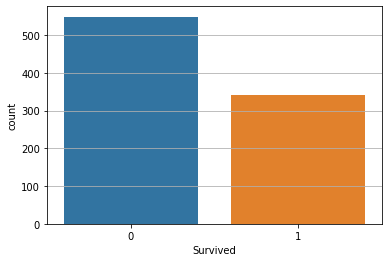

In [21]:
plt.grid(visible=True)
sns.countplot('Survived',data=train_data)

### Making a countplot for survived and not survived based on sex

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

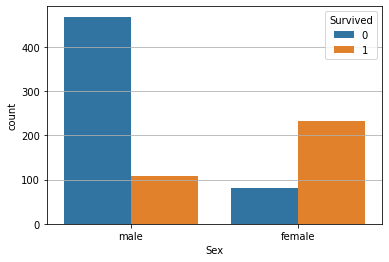

In [22]:
plt.grid(visible=True)
sns.countplot('Sex',hue='Survived',data=train_data)

Analysis:  We can see from this countplot that the more number of females survived than the male

### Making a countplot for survived and not survived based on Pclass

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

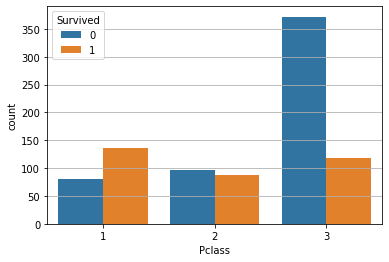

In [23]:
plt.grid(visible=True)
sns.countplot('Pclass',hue='Survived',data=train_data)

Analysis: We can see from that 1st Pclass passenger survived more than 2nd and 3rd Pclass.
          
         Here pclass: A proxy for socio-economic status (SES)
                      1st = Upper
                      2nd = Middle
                      3rd = Lower

### Making a countplot for survived and not survived based on Embarked

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

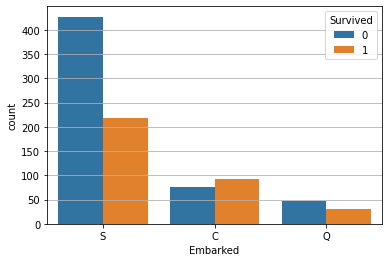

In [24]:
plt.grid(visible=True)
sns.countplot('Embarked',hue='Survived',data=train_data)

Emarked= Port of Embarkation
Analysis: We can see that S port of Embarkation Survived more than C and Q but the number of non survived is also more tha C and Q

In [25]:
train_data[['Survived','Embarked']].value_counts()

Survived  Embarked
0         S           427
1         S           219
          C            93
0         C            75
          Q            47
1         Q            30
dtype: int64

In [26]:
print('C Embarked passenger survival percentage :',(93/168)*100)
print('S Embarked passenger survival percentage :',(219/646)*100)
print('Q Embarked passenger survival percentage :',(30/77)*100)

C Embarked passenger survival percentage : 55.35714285714286
S Embarked passenger survival percentage : 33.90092879256966
Q Embarked passenger survival percentage : 38.961038961038966


Analysis:  Hence form here we can see the survival percentage of C embarked passenger is more.

### Making a countplot for survived and not survived based on Parch

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

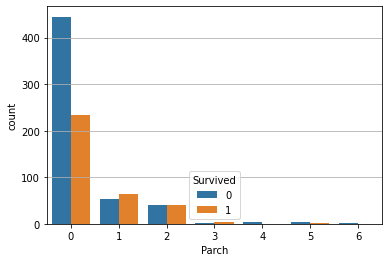

In [27]:
plt.grid(visible=True)
sns.countplot('Parch', hue='Survived',data=train_data)

Parch= Number of parents / children aboard the Titanic
Analysis: Who did not had any family member survived more but the survival percentage of the passenger who had one family member is more and the who had 2 family member.

### Making a countplot for survived and not survived based on Sibsp

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

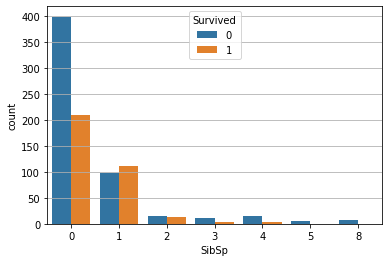

In [28]:
plt.grid(visible=True)
sns.countplot('SibSp', hue='Survived',data=train_data)

sibsp= number of siblings / spouses aboard the Titanic

Analysis: Who did not had Siblings/Spouse survived more but the survival percentage of the passenger who had one sibsp  is more and then who had 2 sibsp.

# Encoding the categorical data

In [29]:
print(train_data['Sex'].value_counts())
print(train_data['Embarked'].value_counts())
print(test_data['Sex'].value_counts())
print(test_data['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


### Converting the categorical columns

In [30]:
train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


### Seeing first 5 columns of train dataset now

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Seeing first 5 columns of test dataset now

In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


# Separating features and target

In [33]:
x_train=train_data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y_train=train_data['Survived']

In [34]:
print(x_train)
print(y_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Model Training

In [35]:
# creating instance of Logistic regression
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

# Predicting values

In [37]:
x_test=test_data.drop(columns=['PassengerId','Name','Ticket'],axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [38]:
y_pred=lr.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Creating csv file for submission 

Only two columns PassengerID and Y_pred value

In [40]:
test_data['Survived']=y_pred
file=test_data[['PassengerId','Survived']]
file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Importing csv

In [41]:
file.to_csv('C:\\Users\\indre\\Desktop\\Rammesh\\Titanic_submit',index=False)

# Calculating accuracy on train dataset

In [42]:
y_train_pred=lr.predict(x_train)

In [43]:
train_data_accuracy=accuracy_score(y_train,y_train_pred)
print('Accuracy score of training data :',train_data_accuracy)

Accuracy score of training data : 0.8047138047138047


# Confusion matrix for train dataset

In [44]:
confusion_matrix(y_train,y_train_pred)

array([[475,  74],
       [100, 242]])